<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Bar_graph_with_Matplotlib/blob/master/Barplot_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

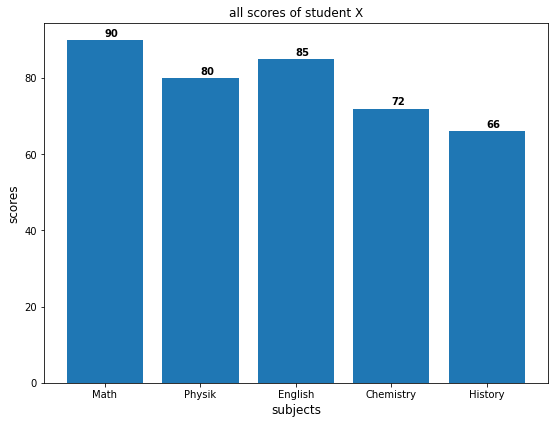

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Math', 'Physik', 'English', 'Chemistry', 'History']
scores = [90,80,85,72,66]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)
ax.set_xlabel('subjects',fontsize= 12)
ax.set_title('all scores of student X')
for i, v in enumerate(scores):
    ax.text( i ,v + 1, str(v), color='black', fontweight='bold')
plt.savefig('barplot_1.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
df= pd.read_excel("model_accs.xlsx",header=0)
df

,model_name,Top-5 acc (%),Top-3 acc (%),Top-1 acc (%)
0,model_1,96.96,94.64,82.32
1,model_2,93.20,88.24,74.04
2,model_3,93.56,89.48,74.80
3,model_4,91.16,86.48,72.32
4,model_5,98.84,97.28,88.60


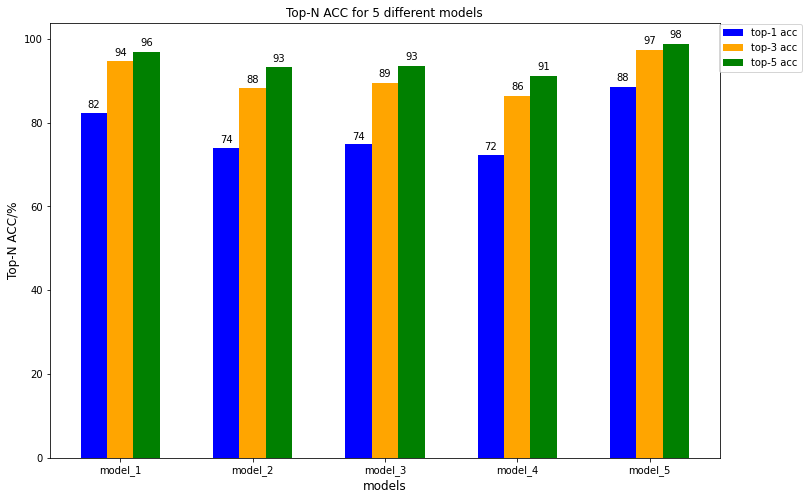

In [ ]:
top_1 = df.iloc[:,3]
top_3 = df.iloc[:,2]
top_5 = df.iloc[:,1]
xlabels = df.iloc[:,0]
N =5
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='b')
rects2 = ax.bar(ind + width, top_3, width, color='orange')
rects3 = ax.bar(ind + 2*width, top_5, width, color='g')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("Top-N ACC/%", fontsize=12)
ax.set_title('Top-N ACC for 5 different models')
ax.legend((rects1[0], rects2[0],rects3[0]),('top-1 acc', 'top-3 acc','top-5 acc'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),ha='center', va='bottom')
labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('barplot_2.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
df= pd.read_excel("model_accs.xlsx",header=0)
df['top-1 acc'] = df['Top-1 acc (%)']
df['top-3 acc'] = df['Top-3 acc (%)']-df['Top-1 acc (%)']
df['top-5 acc'] = df['Top-5 acc (%)']-df['Top-3 acc (%)']
df

,model_name,Top-5 acc (%),Top-3 acc (%),Top-1 acc (%),top-1 acc,top-3 acc,top-5 acc
0,model_1,96.96,94.64,82.32,82.32,12.32,2.32
1,model_2,93.20,88.24,74.04,74.04,14.20,4.96
2,model_3,93.56,89.48,74.80,74.80,14.68,4.08
3,model_4,91.16,86.48,72.32,72.32,14.16,4.68
4,model_5,98.84,97.28,88.60,88.60,8.68,1.56


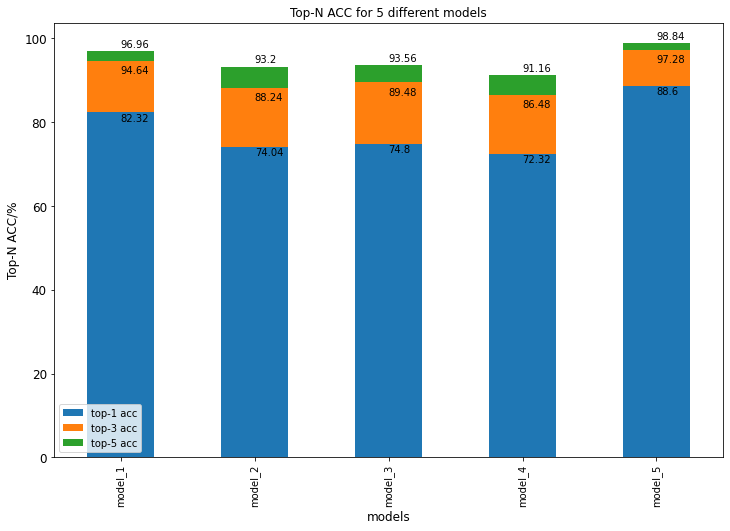

In [ ]:
ax = df[['top-1 acc','top-3 acc','top-5 acc']].plot(kind='bar', title ="Top-N ACC for 5 different models", figsize=(12, 8), legend=True, fontsize=12,stacked=True)
top_1 = df.iloc[:,3]
top_3 = df.iloc[:,2]
top_5 = df.iloc[:,1]
xlabels = df.iloc[:,0]
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("Top-N ACC/%", fontsize=12)
for i, v in enumerate(top_1):
    ax.text( i ,v - 2, str(v), color='black')
for i, v in enumerate(top_3):
    ax.text( i ,v - 3, str(v), color='black')
for i, v in enumerate(top_5):
    ax.text( i ,v + 1, str(v), color='black')
plt.savefig('barplot_2.png',dpi=200, format='png', bbox_inches='tight')
plt.show()